<a href="https://colab.research.google.com/github/SiddharthNarayanan8194/Tasks-Sparks-Foundation-SEP23/blob/main/Task%207%20GRIP%20SEPT23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Author: Siddharth Narayanan**
## **Data Science and Business Analytics Intern @ The Sparks Foundation**
## **Task 7**: Stock Market Prediction using Numerical Analysis
## **Objective**: Create a model for stock price/performance prediction using numerical analysis of historical stock prices.

###Dataset

Historical Stock Price : https://finance.yahoo.com/

News headlines : https://bit.ly/36fFPI6

###**Importing the Required Libraries**

In [144]:
#Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [146]:
#Importing Libraries required for NUMERICAL ANALYSIS

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [147]:
#Importing Libraries required for making PREDICTION

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [148]:
#Download the dataset from the given links.
!pip install yahoofinancials
import yfinance as yf

from yahoofinancials import YahooFinancials

# in order to specify start date and
# end date we need datetime package
import datetime

# startDate , as per our convenience we can modify
startDate = datetime.datetime(2017, 1, 1)

# endDate , as per our convenience we can modify
endDate = datetime.datetime(2022, 9, 13)
data = yf.download("^BSESN",startDate,endDate,progress=False)
print("Required Data Successfully Downloaded")

Required Data Successfully Downloaded


In [149]:
data.head(10) #Displaying top 10 rows of the financial data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,26711.150391,26720.980469,26447.060547,26595.449219,26595.449219,8000
2017-01-03,26616.919922,26724.400391,26488.369141,26643.240234,26643.240234,9800
2017-01-04,26677.220703,26723.369141,26606.060547,26633.130859,26633.130859,8100
2017-01-05,26738.419922,26917.210938,26738.419922,26878.240234,26878.240234,9800
2017-01-06,26929.689453,27009.609375,26733.330078,26759.230469,26759.230469,7800
2017-01-09,26860.810547,26860.880859,26701.179688,26726.550781,26726.550781,6400
2017-01-10,26811.630859,26914.949219,26804.169922,26899.560547,26899.560547,8600
2017-01-11,26978.439453,27174.869141,26978.439453,27140.410156,27140.410156,12000
2017-01-12,27171.660156,27278.929688,27166.689453,27247.160156,27247.160156,11700


In [150]:
data.tail(10) #Displaying bottom 10 rows of the financial data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-29,57367.468750,58208.300781,57367.468750,57972.621094,57972.621094,14500
2022-08-30,58259.851562,59599.781250,58245.488281,59537.070312,59537.070312,12800
2022-09-01,58710.531250,59309.789062,58522.570312,58766.589844,58766.589844,19200
2022-09-02,58969.019531,59108.660156,58558.640625,58803.328125,58803.328125,10700
2022-09-05,58814.078125,59308.250000,58812.199219,59245.980469,59245.980469,12900
2022-09-06,59285.359375,59566.671875,58974.261719,59196.988281,59196.988281,13800
2022-09-07,58789.261719,59166.460938,58722.890625,59028.910156,59028.910156,9000
2022-09-08,59374.988281,59711.960938,59315.710938,59688.218750,59688.218750,12100
2022-09-09,60045.750000,60119.800781,59634.390625,59793.140625,59793.140625,13100


In [151]:
#Converting this obtained file into CSV.
data.to_csv("Stock_prices_trend.csv")

###**Importing Needed Datasets**

In [154]:
#Importing the stock market price dataset which is in csv.
Stock=pd.read_csv('Stock_prices_trend.csv')

#Importing the Indian_news_headlines dataset which is in csv.
News = pd.read_csv('india-news-headlines.csv',index_col = False)
News.head(10) # Displaying top 10 rows of news



,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
5,20010102,unknown,Dilute the power of transfers; says Riberio
6,20010102,unknown,Focus shifts to teaching of Hindi
7,20010102,unknown,IT will become compulsory in schools
8,20010102,unknown,Move to stop freedom fighters' pension flayed
9,20010102,unknown,Gilani claims he applied for passport 2 years ago


In [155]:
News.tail(10) # Displaying bottom 10 rows of news

,publish_date,headline_category,headline_text
51624,20011210,city.bengaluru,Farmers to defy govt order on cane transport
51625,20011210,city.lucknow,Kesco workers felicitated
51626,20011210,city.hyderabad,Dissidents did not meet Daljit Singh: MSR
51627,20011210,city.bengaluru,21-member dacoit gang nabbed
51628,20011210,city.chandigarh,Morcha finds following at first major rally
51629,20011210,city.bengaluru,Deflated tyre causes tension in Hubli
51630,20011210,city.patna,Nitish for change in minimum support price scheme
51631,20011210,city.pune,State govt under fire over devdasi system
51632,20011210,city.bengaluru,Question mark over water for Bellary thermal p...
51633,2,NaN,NaN


###**Data Pre-Processing**

In [156]:
News.isnull().sum() # removed all missing values from the headline_text column

publish_date         0
headline_category    1
headline_text        1
dtype: int64

In [157]:
News['headline_text']=News.fillna("Some business related news",inplace=True)

In [158]:
np.shape(News) # Showing number of rows and columns

(51634, 3)

In [159]:
News.info() # Displaying the data structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51634 entries, 0 to 51633
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   publish_date       51634 non-null  int64 
 1   headline_category  51634 non-null  object
 2   headline_text      0 non-null      object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [160]:
np.shape(Stock) #Displaying the total rows and columns of the Stock data

(1403, 7)

In [161]:
Stock.isnull().sum() # Checking for missing values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [162]:
News.isnull().sum() # Again checking for any missing value in the News dataset

publish_date             0
headline_category        0
headline_text        51634
dtype: int64

No missing values are present in the 'Stock' and 'News' data therefore, we can go ahead with further analysis.

In [163]:
Stock.info() # Understanding the structure of the Stock data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1403 non-null   object 
 1   Open       1403 non-null   float64
 2   High       1403 non-null   float64
 3   Low        1403 non-null   float64
 4   Close      1403 non-null   float64
 5   Adj Close  1403 non-null   float64
 6   Volume     1403 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 76.9+ KB


In [164]:
News.sample(10) # Randomly selecting specified number of items from the News data

,publish_date,headline_category,headline_text
25453,20010908,cricket,None
8790,20010722,unknown,None
36455,20011010,city.patna,None
41805,20011102,city.ahmedabad,None
40928,20011030,city.pune,None
5586,20010620,city.thiruvananthapuram,None
32245,20010925,city.ahmedabad,None
36690,20011011,city.hyderabad,None
39302,20011023,india,None
16011,20010817,city.ahmedabad,None


In [165]:
#We dont need the headline_category column,so we will drop it.
np.shape(News)


(51634, 3)

In [166]:
Stock.sample(10) # Randomly selecting specified number of items from the Stock data

,Date,Open,High,Low,Close,Adj Close,Volume
13,2017-01-19,27253.339844,27348.189453,27219.890625,27308.599609,27308.599609,10800
619,2019-07-09,38754.468750,38814.230469,38435.871094,38730.820312,38730.820312,18800
34,2017-02-20,28481.910156,28696.529297,28419.269531,28661.580078,28661.580078,8900
521,2019-02-08,36873.589844,36885.578125,36480.621094,36546.480469,36546.480469,21600
317,2018-04-13,34167.531250,34313.140625,34103.531250,34192.648438,34192.648438,8300
622,2019-07-12,38941.101562,39021.839844,38684.851562,38736.230469,38736.230469,12900
891,2020-08-19,38727.890625,38788.511719,38550.648438,38614.789062,38614.789062,12800
1257,2022-02-09,58163.011719,58507.609375,58105.179688,58465.968750,58465.968750,5900
563,2019-04-15,38805.539062,38976.578125,38780.078125,38905.839844,38905.839844,20900
121,2017-06-29,30910.970703,31097.919922,30794.609375,30857.519531,30857.519531,12300


In [167]:
#Lets rename the column names of the News dataset.
News.rename(columns={'publish_date':'Date','headline_text':'News Headline','headline_category':'Category'},inplace=True)
News.head()

,Date,Category,News Headline
0,20010102,unknown,None
1,20010102,unknown,None
2,20010102,unknown,None
3,20010102,unknown,None
4,20010102,unknown,None


In [168]:
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51634 entries, 0 to 51633
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           51634 non-null  int64 
 1   Category       51634 non-null  object
 2   News Headline  0 non-null      object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [169]:
Stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1403 non-null   object 
 1   Open       1403 non-null   float64
 2   High       1403 non-null   float64
 3   Low        1403 non-null   float64
 4   Close      1403 non-null   float64
 5   Adj Close  1403 non-null   float64
 6   Volume     1403 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 76.9+ KB


We can see that the datatype of Date in 'News' dataset is integer where as in 'Stock' dataset it is object. Let's convert them to objects first and then to datetime so that their format and nature will be same as we need to merge them later.


In [170]:
# Converting object column in Stock dataset to datetime format
Stock['Date'] = pd.to_datetime(Stock['Date'])
Stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,26711.150391,26720.980469,26447.060547,26595.449219,26595.449219,8000
1,2017-01-03,26616.919922,26724.400391,26488.369141,26643.240234,26643.240234,9800
2,2017-01-04,26677.220703,26723.369141,26606.060547,26633.130859,26633.130859,8100
3,2017-01-05,26738.419922,26917.210938,26738.419922,26878.240234,26878.240234,9800
4,2017-01-06,26929.689453,27009.609375,26733.330078,26759.230469,26759.230469,7800


In [171]:
# Converting integer type column in News dataset to datetime
News['Date']=News['Date'].apply(str)
News['Date'].dtype
News['Date']=pd.to_datetime(News['Date'],errors='coerce')
News.head()


,Date,Category,News Headline
0,2001-01-02,unknown,None
1,2001-01-02,unknown,None
2,2001-01-02,unknown,None
3,2001-01-02,unknown,None
4,2001-01-02,unknown,None


In [199]:
News.tail(10)

,Date,Category,News Headline
51624,2001-12-10,city bengaluru,None
51625,2001-12-10,city lucknow,None
51626,2001-12-10,city hyderabad,None
51627,2001-12-10,city bengaluru,None
51628,2001-12-10,city chandigarh,None
51629,2001-12-10,city bengaluru,None
51630,2001-12-10,city patna,None
51631,2001-12-10,city pune,None
51632,2001-12-10,city bengaluru,None
51633,NaT,Some business related news,None


In [173]:
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51634 entries, 0 to 51633
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           51633 non-null  datetime64[ns]
 1   Category       51634 non-null  object        
 2   News Headline  0 non-null      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.2+ MB


In [174]:
Stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1403 non-null   datetime64[ns]
 1   Open       1403 non-null   float64       
 2   High       1403 non-null   float64       
 3   Low        1403 non-null   float64       
 4   Close      1403 non-null   float64       
 5   Adj Close  1403 non-null   float64       
 6   Volume     1403 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 76.9 KB


Now, we can see that the columns involving dates in both datasets have similar DateTime format.

In [175]:
#This is to check whether there any duplicate value is there or not

News.duplicated().sum()

48483

In [176]:
#This is to check whether there any duplicate value is present or not
Stock.duplicated().sum()

0

From above, we can clearly see that there are no duplicate values present in 'Stock' and 'News' datasets.

In [177]:
Stock=Stock[["Date","Open","High","Low","Close","Volume"]]
Stock.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-02,26711.150391,26720.980469,26447.060547,26595.449219,8000
1,2017-01-03,26616.919922,26724.400391,26488.369141,26643.240234,9800
2,2017-01-04,26677.220703,26723.369141,26606.060547,26633.130859,8100
3,2017-01-05,26738.419922,26917.210938,26738.419922,26878.240234,9800
4,2017-01-06,26929.689453,27009.609375,26733.330078,26759.230469,7800


Text(0, 0.5, '^BSESN (Closing Values)')

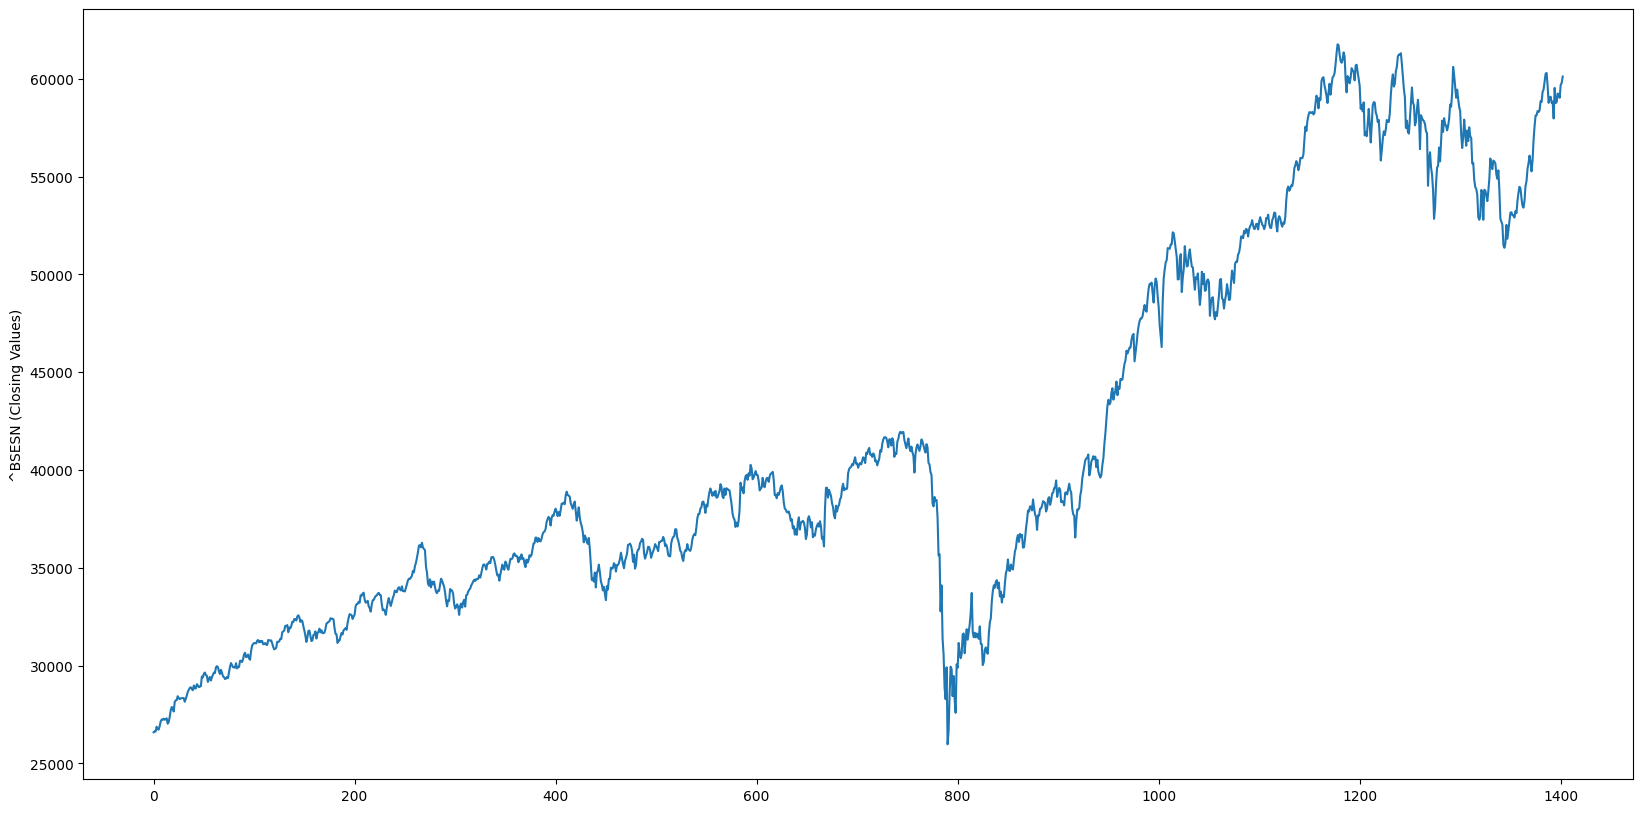

In [178]:
# Figure plot
plt.figure(figsize=(20,10))
Stock['Close'].plot()
plt.ylabel('^BSESN (Closing Values)') # ^BSESN means S&P BSE Sensex

###**Removing Unwanted Characters from the News**

In [192]:
#removing unwanted characters from the News Headline
News.replace("[^a-zA-Z']"," ",regex=True,inplace=True)


###**Historical Analysis**

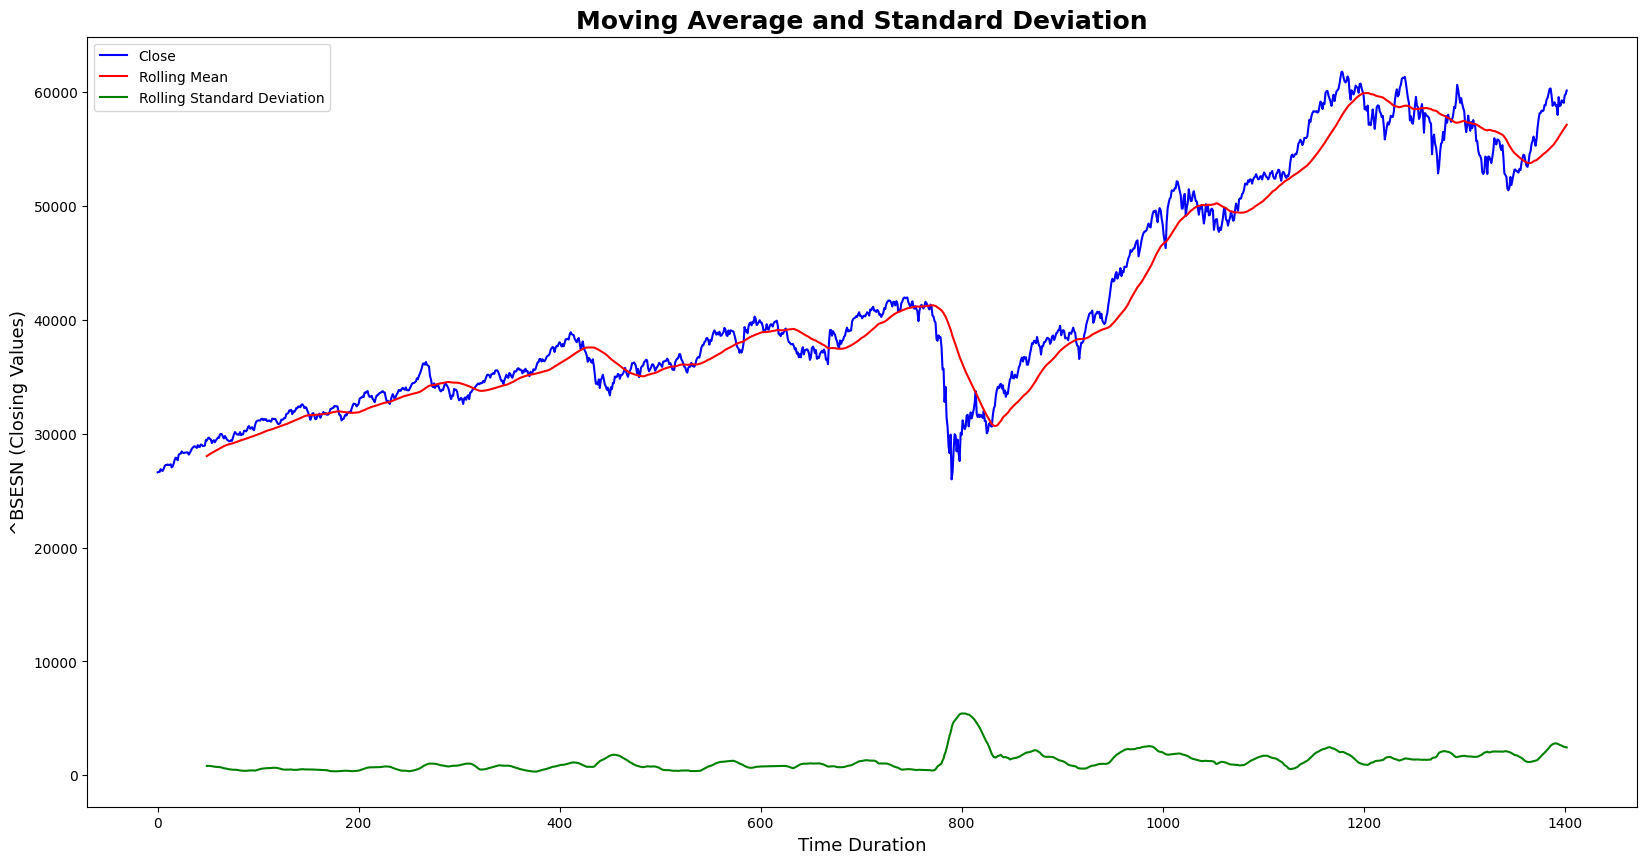

In [195]:
# Plotting moving average: We are choosing a window period of 50
mov_avg = Stock['Close'].rolling(window = 50).mean()
std_dev = Stock['Close'].rolling(window = 50).std()
plt.figure(figsize=(20,10))
Stock['Close'].plot(color='blue',label='Close')
mov_avg.plot(color = 'r',label='Rolling Mean')
std_dev.plot(color='g',label ='Rolling Standard Deviation')
plt.xlabel('Time Duration',fontsize=13)
plt.ylabel('^BSESN (Closing Values)',fontsize=13)
plt.title("Moving Average and Standard Deviation",fontweight='bold',fontsize=18)
plt.legend()


###**Plotting the Returns**

Text(0.5, 1.0, 'Returns on Daily Basis')

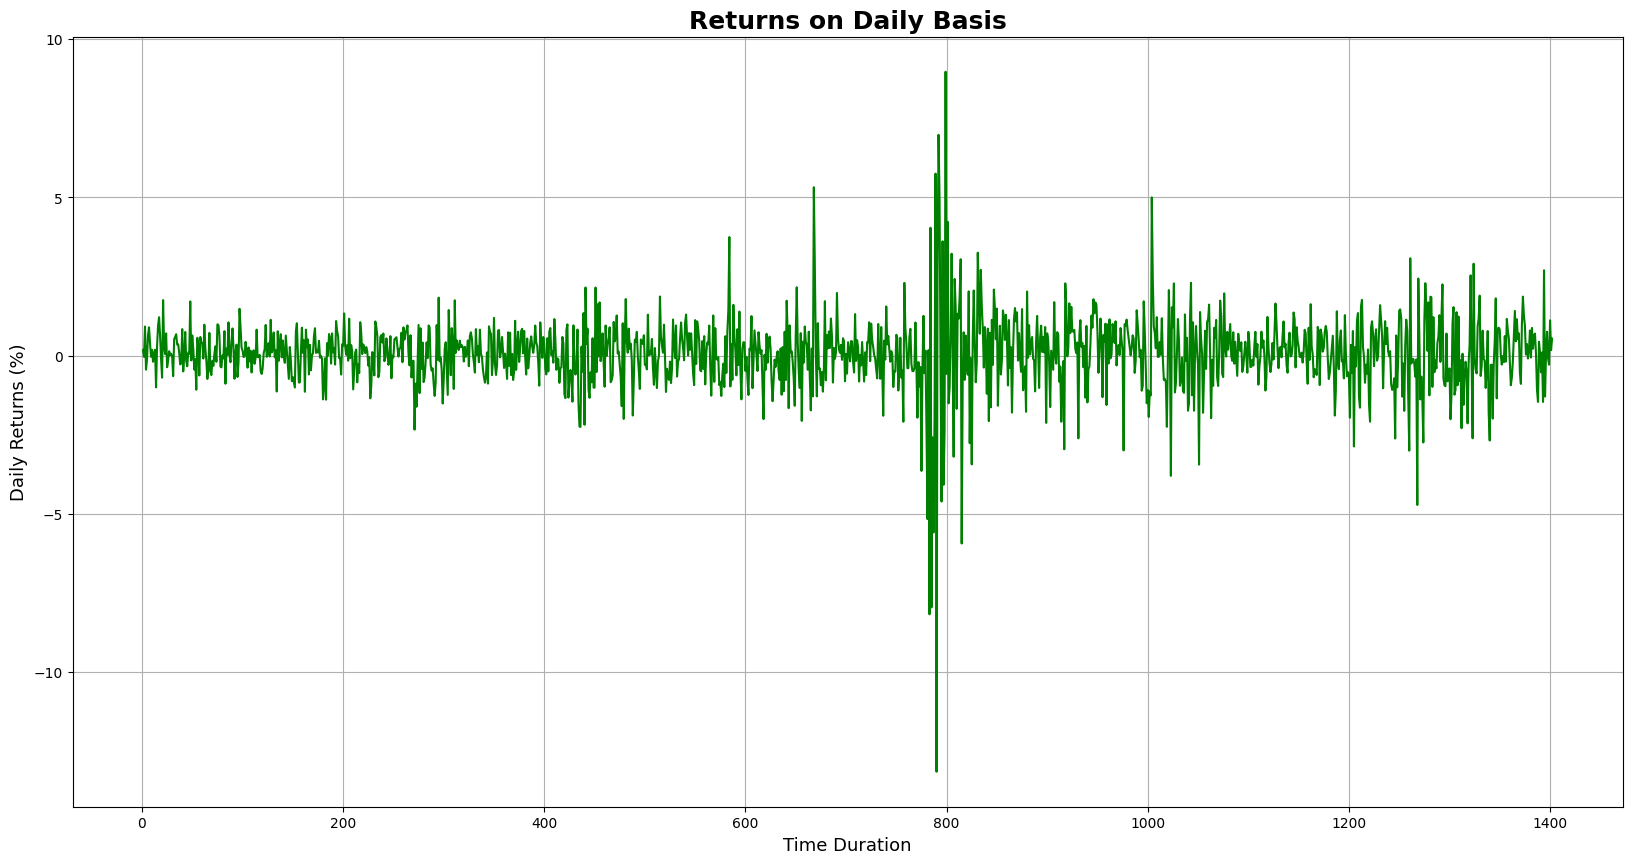

In [181]:
Stock['BSESN_Daily_Return']= (Stock['Close'] / Stock['Close'].shift(1) - 1)*100
plt.figure(figsize = (20,10))
Stock['BSESN_Daily_Return'].plot(label='Return', color = 'green')
plt.ylabel('Daily Returns (%)',fontsize=13)
plt.xlabel("Time Duration",fontsize=13)
plt.grid()
plt.title("Returns on Daily Basis",fontweight='bold',fontsize=18)

###**Rolling Statistics Test**

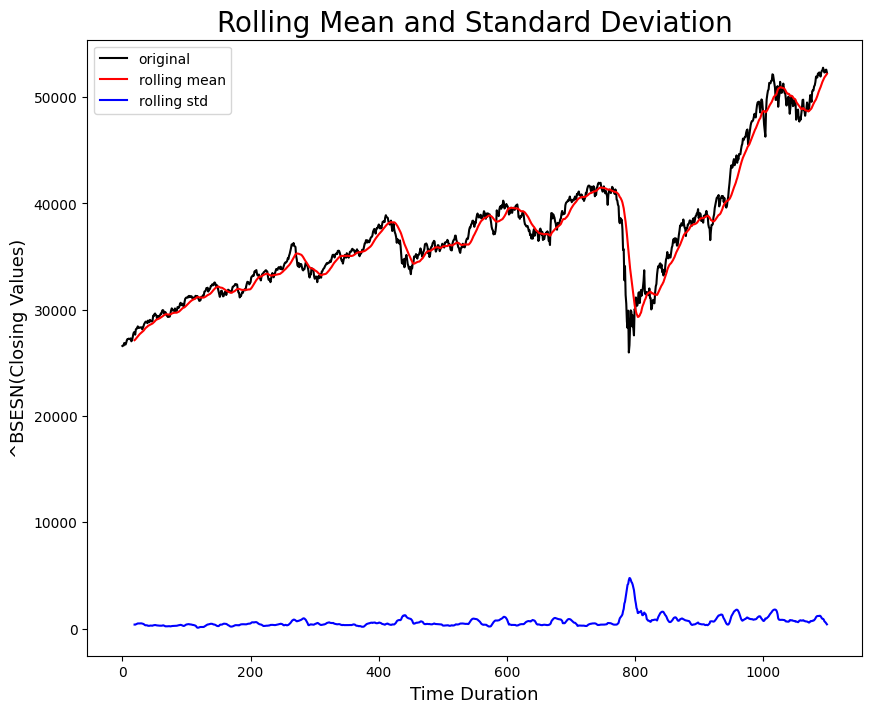

Results of dickey fuller test
ADF Test Statistic : -0.7271765332940214
p-value : 0.839584074167687
#Lags Used : 12
Number of Observations Used : 1087
Weak evidence against null hypothesis, time series is non-stationary 


In [198]:
# Train test split
train = Stock[:1100]
test = Stock[1100:]

#Stationarity test
def test_stationarity(timeseries):

 #Determing rolling statistics
 rolmean = timeseries.rolling(20).mean()
 rolstd = timeseries.rolling(20).std()

 #Plot rolling statistics:
 plt.figure(figsize = (10,8))
 plt.plot(timeseries, color = 'black', label = 'original')
 plt.plot(rolmean, color = 'r', label = 'rolling mean')
 plt.plot(rolstd, color = 'b', label = 'rolling std')
 plt.xlabel('Time Duration',fontsize=13)
 plt.ylabel('^BSESN(Closing Values)',fontsize=13)
 plt.legend()
 plt.title('Rolling Mean and Standard Deviation',  fontsize = 20)
 plt.show(block = False)

 print('Results of dickey fuller test')
 result = adfuller(timeseries, autolag = 'AIC')
 # ADC means Augmented Dickey Fuller Test
 labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
 for value,label in zip(result, labels):
   print(label+' : '+str(value) )
 if result[1] <= 0.05:
   print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
 else:
   print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train['Close'])


Technical analysts utilize Simple Moving Averages(SMAs) by looking at points where the stock price crosses over the SMA. An assumption that many technical analysts follow is that the rolling mean may be a good representation of the true, underlying price of the stock and that significant deviations from that mean eventually result in a return to the mean.As a result, if you can spot significant deviations from the mean, you might be able to spot a buying opportunity.

###**Removing Trends**

Text(0.5, 0, 'Time Duration')

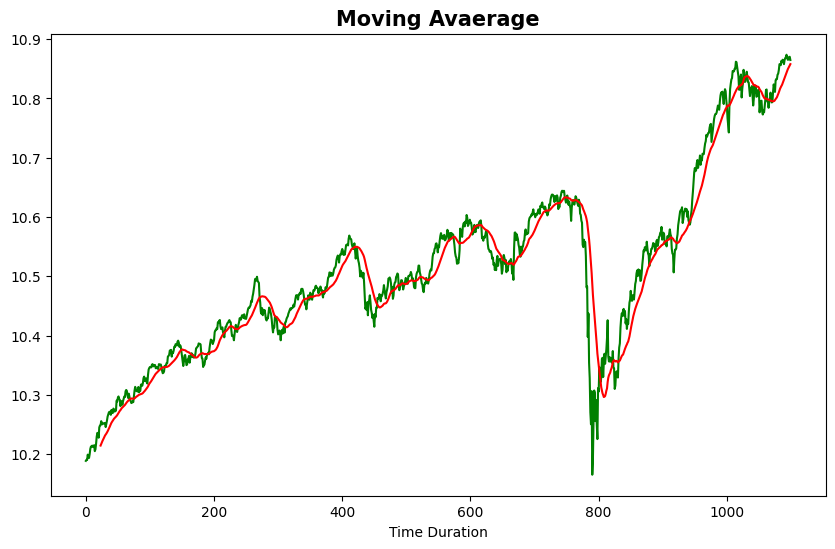

In [183]:
train_log = np.log(train['Close'])
test_log = np.log(test['Close'])

mov_avg = train_log.rolling(24).mean()
plt.figure(figsize = (10,6))
plt.plot(train_log,color='green')
plt.plot(mov_avg, color = 'red')
plt.title("Moving Avaerage",fontweight='bold',fontsize=15)
plt.xlabel("Time Duration")





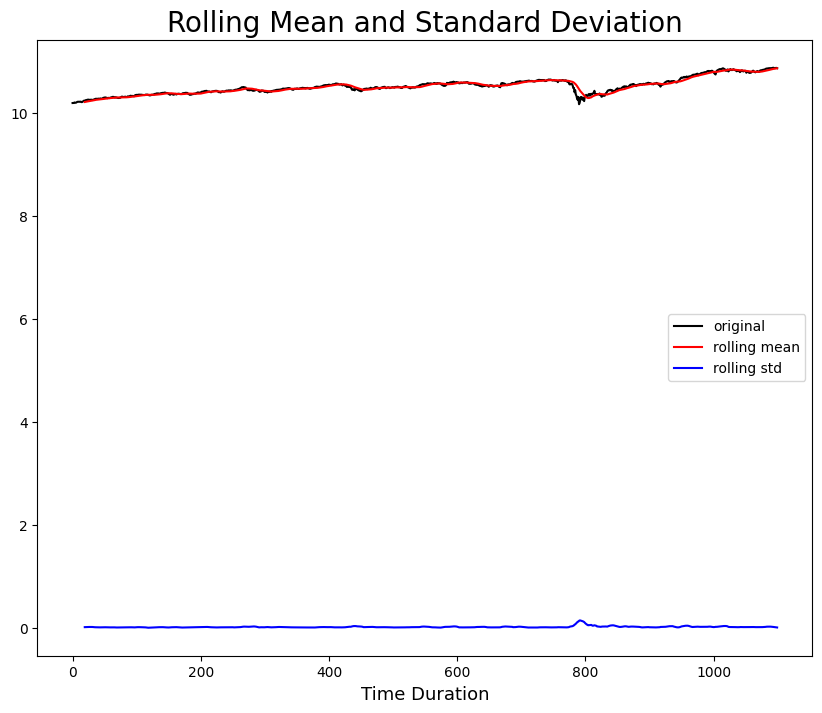

Results of dickey fuller test
ADF Test Statistic : -1.2054605405213397
p-value : 0.6712423251469188
#Lags Used : 11
Number of Observations Used : 1088
Weak evidence against null hypothesis, time series is non-stationary 


In [184]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)

test_stationarity(train_log)

###**Augmented Dickey-Fuller Test**

The **Augmented Dickey-Fuller test (ADF)** is a kind of statistical test called a Unit Root test.In probability theory and statistics, a **unit root** is a feature of some stochastic processes (such as random walks) that can cause problems in statistical inference involving time series models. In simple terms, the **unit root** is **non-stationary** but does not always have a trend component.The ADF test is conducted with the following assumptions:

a) **Null Hypothesis (HO**): Series is non-stationary, or series has a unit root.

b) **Alternate Hypothesis(HA)**: Series is stationary, or series has no unit root.

If the null hypothesis is failed to be rejected, this test may provide evidence that the series is non-stationary.

**Conditions to Reject Null Hypothesis(HO)**

If Test statistic < Critical Value and p-value < 0.05 – Reject Null Hypothesis(HO), i.e., time series does not have a unit root, meaning it is stationary. It does not have a time-dependent structure.

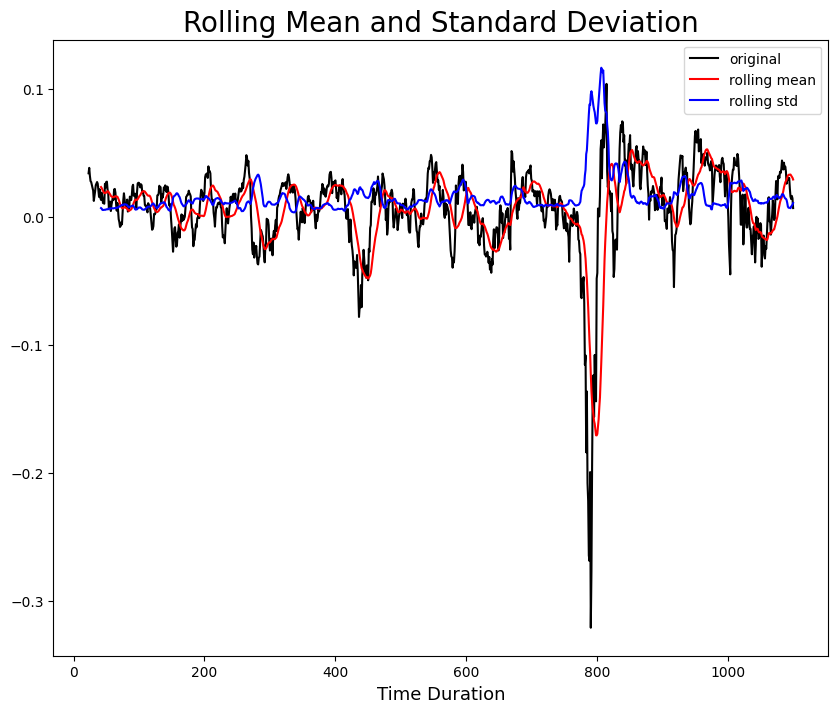

Results of dickey fuller test
ADF Test Statistic : -6.5587223641822945
p-value : 8.486757744652525e-09
#Lags Used : 12
Number of Observations Used : 1064
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [185]:
train_log_diff = train_log - mov_avg
train_log_diff.dropna(inplace = True)
test_stationarity(train_log_diff)


###**It's Time to Make Predictions**

In [186]:
#Using auto arima to make predictions using log data
!pip install pmdarima
from pmdarima import auto_arima
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6569.322, Time=2.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6571.763, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6574.465, Time=0.54 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6574.188, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6570.945, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6573.307, Time=0.72 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6572.912, Time=0.66 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6571.849, Time=0.74 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-6573.260, Time=0.19 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 5.925 seconds


Text(0, 0.5, 'Actual Stock Price')

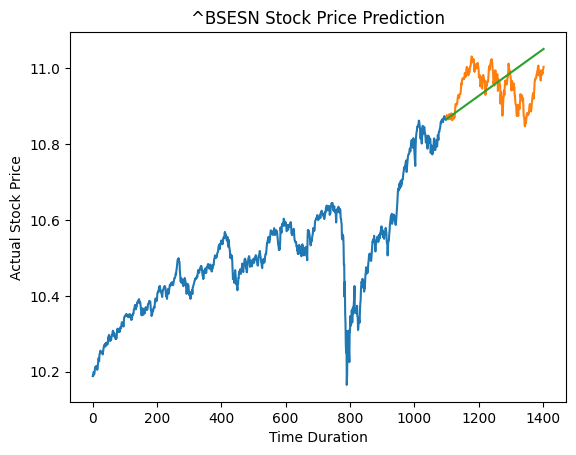

In [187]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('^BSESN Stock Price Prediction')
plt.xlabel('Time Duration')
plt.ylabel('Actual Stock Price') # The orange curve is the forecast part where predictions are made

In [188]:
#Calculating Root Mean Squared error
rms = np.sqrt(mean_squared_error(test_log,predictions))
print("RMSE : ", rms)

RMSE :  0.07193634251816529


One way to assess how well a regression model fits a dataset is to calculate the Root Mean Square Error (RMSE), which tells us the average distance between the predicted values from the model and the actual values in the dataset.The lower the RMSE, the better a given model is able to “fit” a dataset. Here, a RMSE value value closer to 0 represents a better fitting model.

# **Thank You !**